## Creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator and documenting the analysis based off data.

In [10]:
# Dependencies
import matplotlib.pyplot as plt
import requests as requests
import pandas as pd
import seaborn as sb
import numpy as np
import csv
from citipy import citipy

In [22]:
# Save config information.

api_key = "c7f9f57b4779391ea1f5ae067591c971"
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + api_key

# Print URL
print(url)

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c7f9f57b4779391ea1f5ae067591c971


In [23]:
#Installing citipy module
!pip install citipy
from citipy import citipy

#Extracting response for 500 cities
cities = []
city_weather_data =[]
lats = np.random.randint(low=-90, high=90, size=50)
lons = np.random.randint(low=-180, high=180, size=50)
for lat, lon in zip(lats, lons):
    city = citipy.nearest_city(lat, lon)
    #print(city.city_name)
    
    city_weather_request_url = url + "&q=" + city.city_name
    print(city_weather_request_url)
    
    response = requests.get(city_weather_request_url)
    if response.status_code !=404:
        city_weather_data.append(response.json())   

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c7f9f57b4779391ea1f5ae067591c971&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c7f9f57b4779391ea1f5ae067591c971&q=tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c7f9f57b4779391ea1f5ae067591c971&q=puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c7f9f57b4779391ea1f5ae067591c971&q=rikitea
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c7f9f57b4779391ea1f5ae067591c971&q=dalbandin
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c7f9f57b4779391ea1f5ae067591c971&q=tawkar
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c7f9f57b4779391ea1f5ae067591c971&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c7f9f57b4779391ea1f5ae067591c971&q=storforshei
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c7f9f57b4779391ea1f5ae067591c971&q=saint george


In [24]:
city_weather_data[0]

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -54.81, 'lon': -68.31},
 'dt': 1519934400,
 'id': 3833367,
 'main': {'humidity': 66,
  'pressure': 992,
  'temp': 11.56,
  'temp_max': 12,
  'temp_min': 11},
 'name': 'Ushuaia',
 'sys': {'country': 'AR',
  'id': 4754,
  'message': 0.004,
  'sunrise': 1519898293,
  'sunset': 1519947072,
  'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
   'icon': '04d',
   'id': 803,
   'main': 'Clouds'}],
 'wind': {'deg': 230, 'gust': 14.9, 'speed': 6.2}}

In [25]:
# List for holding temperature, humidity, cloudiness and windspeed
# Extract interesting data from responses
    
extracted_data = []
lat_data = 0
temp_data =0
for city_weather in city_weather_data:
    lat_data = city_weather.get("coord").get("lat")
    temp_data = city_weather.get("main").get("temp")
    humid_data = city_weather.get("main").get('humidity')
    cloud_data = city_weather.get('clouds').get('all')
    wind_speed_data = city_weather.get("wind").get('speed')
    
    extract = {'name': city_weather.get('name'),"temp": temp_data, "lat": lat_data, "humidity": humid_data, 'clouds': cloud_data, 'speed': wind_speed_data}
    extracted_data.append(extract)

city_weather_data_df = pd.DataFrame(extracted_data)
#city_weather_data_df.set_index(['name', 'lat', 'temp', 'humidity','clouds', 'speed'])
city_weather_data_df

,clouds,humidity,lat,name,speed,temp
0,75,66,-54.81,Ushuaia,6.20,11.56
1,20,74,69.44,Tuktoyaktuk,2.10,-30.76
2,20,66,-0.74,Puerto Ayora,4.60,29.00
3,80,98,-23.12,Rikitea,8.53,27.40
4,12,90,28.90,Dalbandin,0.18,10.45
5,75,66,-54.81,Ushuaia,6.20,11.56
6,0,83,66.40,Storforshei,1.00,-21.00
7,40,81,39.45,Saint George,1.33,7.00
8,36,75,71.98,Khatanga,3.48,-24.25
9,0,88,29.82,Madinat Sittah Uktubar,3.60,17.00


## Latitude Vs Temperature Plot

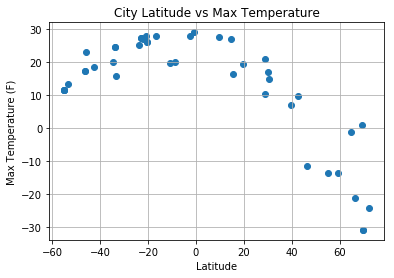

In [26]:
# Build a scatter plot for each data type
plt.scatter(city_weather_data_df["lat"], city_weather_data_df["temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude Vs Humidity Plot

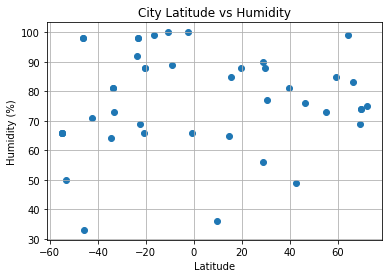

In [27]:
# Build a scatter plot for each data type
plt.scatter(city_weather_data_df["lat"], city_weather_data_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude Vs Cloudiness Plot

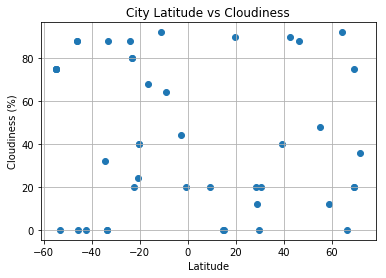

In [28]:
# Build a scatter plot for each data type
plt.scatter(city_weather_data_df["lat"], city_weather_data_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude Vs Wind Speed Plot

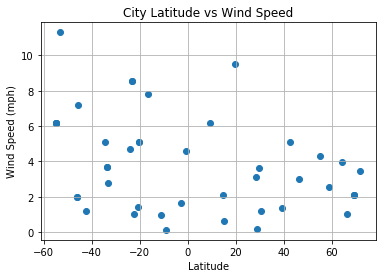

In [29]:
# Build a scatter plot for each data type
plt.scatter(city_weather_data_df["lat"], city_weather_data_df["speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindspeedInWorldCities.png")

# Show plot
plt.show()